# Prediciting the Quality of Red Wine
DH150: Jul 27th 2022
<br>
Christina Cha

## Report Agenda
<b>1</b> | Introduction
<br>
<b>2</b> | Understanding the Data
<br>
<b>3</b> | Prior Works
<br>
<b>4</b> | Modeling <i>(Logistic Regression, Random Forest, k Nearest Neighbors)</i>
<br>
<b>5</b> | Comparison of Final Results with Prior Works
<br>
<b>6</b> | Conclusion

## 1 | Introduction

Wine experts utilize taste and perception of the wine to determine wine quality. However, it is undeniable that the components of the wine itself as well as the methods used to produce the wine play a significant role in determining how the wine tastes and, ultimately, the level of quality achieved by the wine. This research will focus on utilizing machine learning to forecast the quality of red wine based on the various features that are present in the wine. 

## 2 | Understanding the Data

#### Data Introduction
For this project, I will be using the <a href="http://archive.ics.uci.edu/ml/datasets/Wine+Quality">Red Wine Quality Data Set</a> from UCI Machine Learning Repository. The dataset is related to red variants of the Portuguese "Vinho Verde" wine. The dataset is comprised of a total of 12 variables, each of which was documented for each of the 1,599 observations. The 11 input variables based on physicochemical tests include To see which variables are likely to affect the quality of red wine the most, I ran a correlation analysis of our independent variables against our dependent variable, quality. This analysis ended up with a list of variables of interest that had the highest correlations with quality. Through this dataset, we will be able to develop a variety of regression models to investigate the extent to which a variety of independent factors contribute to the prediction of our output variable based on sensory data, quality. 

In [1]:
import pandas as pd

# Import Red Wine Quality Data
df = pd.read_csv("winequality-red.csv")
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
#Count, Mean, STD, Min~Max
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.index

RangeIndex(start=0, stop=1599, step=1)

In [5]:
df.shape

(1599, 12)

#### Data Breakdown
In order to find which attribute had the greatest impact on on the quality of red wine, I conducted a correlation test of the input variables against the output variable. I did the correlation test using a heat map and a function that selects highly correlated features.

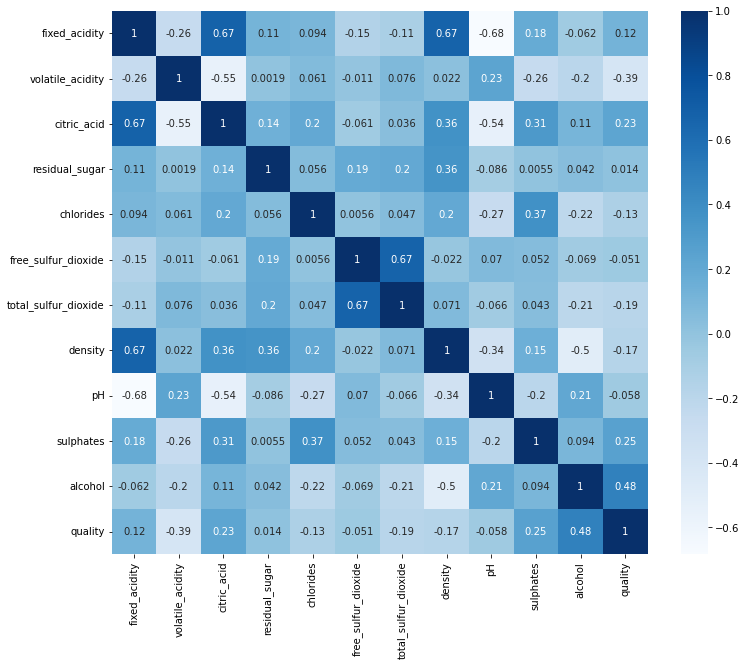

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Heat Map
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [7]:
#Correlation with output variable
cor_target = abs(cor["quality"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

volatile_acidity    0.390558
citric_acid         0.226373
sulphates           0.251397
alcohol             0.476166
quality             1.000000
Name: quality, dtype: float64

<b>Based on the heat map and function, the attribute with the highest correlation with quality is as follows:</b>
<br>
<i>1 = highest correlation ... 10 = lowest correlation</i>
1. <b>Alcohol:</b> the percent alcohol content of the wine
2. <b>Volatile Acidity:</b> the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. <b>Sulphates:</b> a wine additive which can contribute to sulfur dioxide gas (S02) levels
4. <b>Citric Acid:</b> found in small quantities, citric acid can add 'freshness' and flavor to wines
5. <b>Total Sulfur Dioxide:</b> amount of free and bound forms of S02
6. <b>Density:</b> the density of water is close to that of water depending on the percent alcohol and sugar content
7. <b>Chlorides:</b> the amount of salt in the wine
8. <b>Fixed acidity:</b> most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
9. <b>pH:</b> describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4
10. <b>Free Sulfur Dioxide:</b> the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
11. <b>Residual Sugar:</b> the amount of sugar remaining after fermentation stops

<b>Plots</b>
<br>
In addition to the correlation, I wanted to further see the specific relationship of each attribute against the "quality" variable. I created both density and box plots for all 11 attributes to understand the data distribution. 

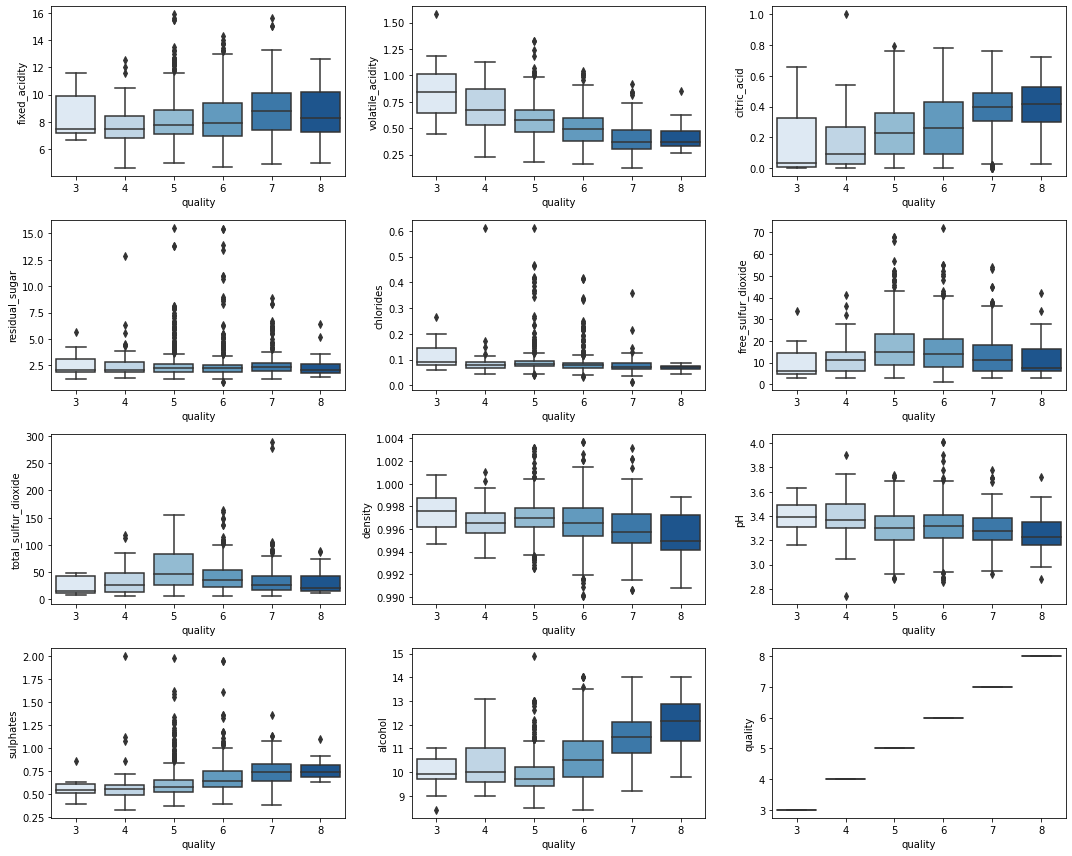

In [8]:
# Box Plots
fig = plt.figure(figsize=[15,12])
cols = df.columns
cnt = 1
for col in cols:
    plt.subplot(4,3,cnt)
    sns.boxplot(x="quality", y=col, data=df, palette="Blues")
    cnt = cnt+1
plt.tight_layout()
plt.show()

<b>Box Plot Analysis</b>
<br>
Based on the box plots, we can conclude that red wines that are higher quality have higher levels of alcohol, sulphates, and citric acid. On the other hand, red wines that are lower quality have high volatile acidity, density, and pH. Finally, attributes such as residual sugar, total sulfur dioxide, free sulfur dioxide, and chlorides have no effect or significant relationship with the quality of red wine.  

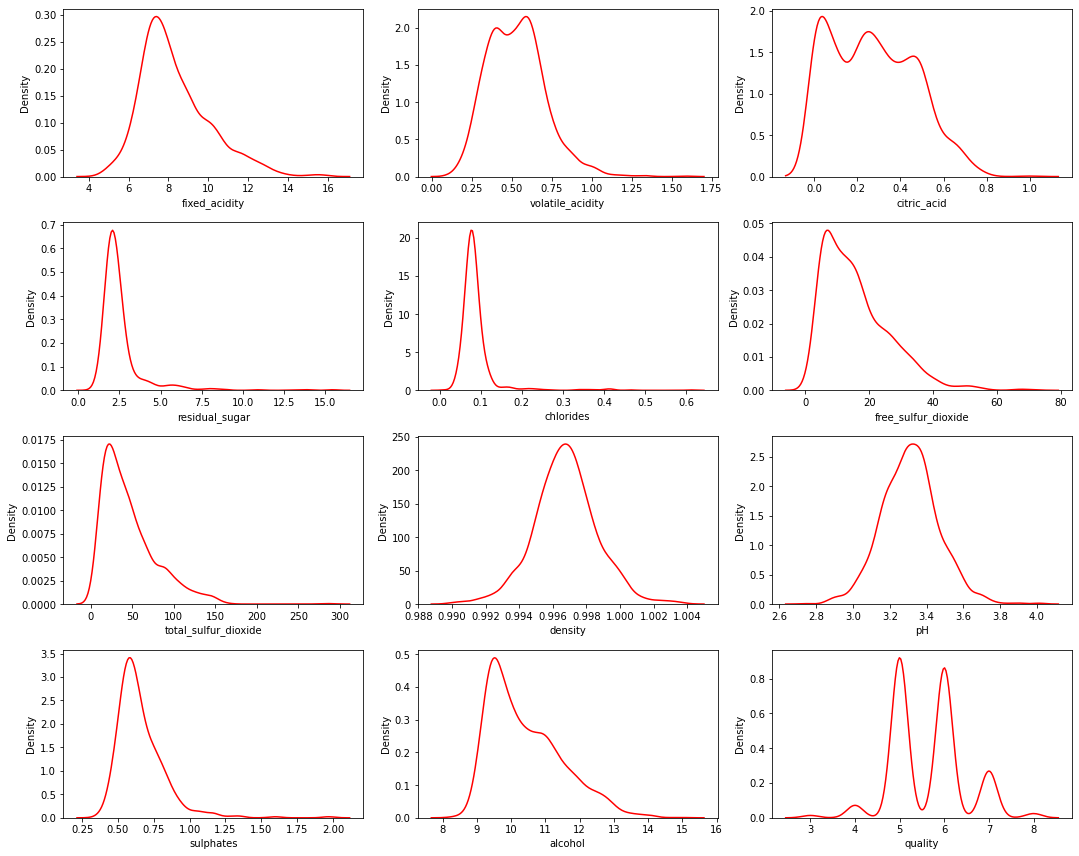

In [9]:
# Density Plots
fig = plt.figure(figsize=[15,12])
cols = df.columns
cnt = 1

for col in cols:
    plt.subplot(4,3,cnt)
    sns.kdeplot(df[col], color="red")
    cnt+=1
plt.tight_layout()
plt.show()

<b>Density Plot Analysis</b>
- The pH level is constantly between 3 and 4 
- Chloride level stays around 0.08-0.1
- The most common ratings for wine quality is either 5 or 6. 

## 3 | Prior Works

#### Research Paper 1
<b>Citation:</b> S. Kumar, K. Agrawal, and N Mandan. Red Wine Quality Prediction Using Machine Learning Techniques. 1-6. 10.1109/ICCCI48352.2020.9104095, 2020.

<b>Summary:</b> In this research paper, the authors utilize three different methods of machine learning, naive payes algorithm , support vector machine, and random forest, in RStudio to predict the quality of red wine using the data set taken from the machine learning repository at UCI. The red wine dataset consists of 1599 different occurrences and 12 different variables. For this particular collection of data, the qualities fall somewhere between the numbers 3 and 8, with a score of 3 indicating red wine of poor quality and a score of 8 indicating red wine of exceptional quality. The dataset is separated into two parts: training and testing, with probabilities of 0.7 and 0.3, respectively. Using these datasets, they use the three different machine learning methods. Then, the algorithms computed several performance indicators such as precision, recall, specificity, f-measure, accuracy, and misclassification error. These metrics were used to forecast results.

<b>Results:</b> The results demonstrate that Support Vector Machine outperformed the other models acheiving an accuracy of 67.25% for prediction of red wine quality, followed by Random Forest with an accuracy of 65.83% and Nave Bayes with an accuracy of 55.91%. This is because the training dataset includes a 
high probability of division of 0.7.

<b>Limitations:</b> Some limitations to consider for this article is that the researchers focused on only red wines rather than both red and white wines. So these conclusions only apply to red wines as there are differences in the various attributes between the two types of wines. In addition, the results in this article may not reflect the same to other sommeliers as this dataset was based on a specific group of sommeliers. Wine quality is very subjective, hence the identities and credentials of those evaluating wine quality in this study should have been clearly indicated. This limitation is something that is overlooked in the article. As for biases, it is important to consider that some of the techniques used can result in a biased or skewed result. For example, the Naive Bayes Algorithm can make the model biased towards the classes that are overrepresented if the dataset is unbalanced. 

Below is an image of the results of the Random Forest on both the training and testing datasets. 
<br>
<img src="researchpaper1_rf.png" width="400" height="auto">

#### Research Paper 2
<b>Citation:</b> N. Spriggs, M. Dunne, C. Life, G. Richardson, H. Xu. SENG474: Wine Analysis, 2020.

<b>Summary:</b> Similarly to the previous research paper, the authors of this paper utilize the wine dataset to establish an empirical relationship between a wine's subjective quality and its chemical makeup. They analyze both white and red wines. Their strategy involved doing in-depth research and analysis of classification algorithms before comparing them to various regressors. In addition, they wanted to see if some components had a higher influence on the quality of wine as it is viewed than others since they believed that this knowledge would be beneficial to wine makers. They used 10-fold cross validation in the model validation phase for each of the models to counteract the negative impact of having too big of a training set and too small of a test. The Root Mean Squared Error, or RMSE, was utilized in this study to assess the performance of each model. They used for different machine learning methods including naive payes algorithm, support vector machine, prism algorithm, and random decision forest.

<b>Results:</b> The results demonstrate that random decision forest outperformed the other models acheiving the lowest RMSE of  0.6430 for
white wine and 0.6322 for red wine, the best model to predict wine quality prediction.

<b>Limitations:</b> There are several limitations to keep in mind when reading the article. First, the data set is composed of wine metrics that were extracted from a collection of 6499 Portuguese vinho verde wines. Of these wines, 4899 bottles are white wine and 1600 bottles are red wine; hence, any conclusions that are derived are exclusively relevant to the specific type of wine. Second, wine tasting is a qualitative and subjective process based on the selection of professional sommeliers. The taste preferences not only vary between different people, but also from different continents. The article did not mention any details about the sommeliers.

Below is an image of the results of the different methods on both white and red wine. 
<br>
<img src="researchpaper2.png" width="600" height="auto">


## 4 | Modeling

The data's classifications are not balanced since there are far more wines that are rated as average as opposed to wines that are rated as low or high. In order to mitigate this problem, I will divide the quality of the wine into two categories: low quality and high quality by assigning a range to each score. In this case, I will assign quality scores between 3 to 6 as 0 (low quality wine) and quality scores between 7 and 8 as 1 (high quality wine).

In [37]:
# Classifying the quality of wine in to two classes: low and high   
df['quality'] = df['quality'].replace([3, 4, 5, 6], 0)
df['quality'] = df['quality'].replace([7, 8], 1)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


As we can see below, there are 1382 wines categorized as low quality and 217 wines categorized as high quality.

In [38]:
# Number of wines per class
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

#### Train and Test Data Split

Now, I will split the balanced data into train and test before determining which machine learning model can accurately predict the quality of red wine based on the features.

In [42]:
# library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, recall_score, mean_squared_error
from sklearn import metrics

In [43]:
# Array
x = df.drop(['quality'], axis=1)
y = df['quality'] 

In [44]:
# Split, Train, Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

### Logistic Regression Model

In [15]:
# Model Object
model1 = LogisticRegression(max_iter=4000)

In [16]:
# Train the model
model1.fit(x_train,y_train)

LogisticRegression(max_iter=4000)

In [17]:
# Prediction on Test
y_pred1=model1.predict(x_test)

In [18]:
# Classification Report
print("Classification Report:", classification_report(y_test, y_pred1))

Classification Report:               precision    recall  f1-score   support

           0       0.89      0.96      0.92       413
           1       0.53      0.25      0.34        67

    accuracy                           0.86       480
   macro avg       0.71      0.61      0.63       480
weighted avg       0.84      0.86      0.84       480



In [19]:
# Confusion Metrics
print("Confusion Metrics:", confusion_matrix(y_test, y_pred1))

Confusion Metrics: [[398  15]
 [ 50  17]]


In [20]:
# Recall & Precision
print("Recall:", metrics.recall_score(y_test, y_pred1, average="micro"))
print("Precision Score:", metrics.precision_score(y_test, y_pred1, average="micro"))

Recall: 0.8645833333333334
Precision Score: 0.8645833333333334


In [21]:
# Calculate the Accuracy Score.
lr = accuracy_score(y_test, y_pred1)
print(lr)

0.8645833333333334


<b>Results:</b> The logistic model accurately predicted <b>86.5%</b> of the red wines to be low or high quality.
In this case, 89% of the wines are predicted to be low quality while 53% of the wines are predicted to be high quality.

### Random Forest

In [22]:
# Model Object
model2=RandomForestClassifier(n_estimators=100)

In [23]:
# Train the model
model2.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
# Prediction on Test
y_pred2=model2.predict(x_test)

In [25]:
# Classification Report
print("Classification Report:", classification_report(y_test, y_pred2))

Classification Report:               precision    recall  f1-score   support

           0       0.92      0.96      0.94       413
           1       0.68      0.51      0.58        67

    accuracy                           0.90       480
   macro avg       0.80      0.73      0.76       480
weighted avg       0.89      0.90      0.89       480



In [26]:
# Confusion Metrics
print("Confusion Metrics:", confusion_matrix(y_test, y_pred2))

Confusion Metrics: [[397  16]
 [ 33  34]]


In [27]:
# Recall & Precision
print("Recall:", metrics.recall_score(y_test, y_pred2, average="micro"))
print("Precision Score:", metrics.precision_score(y_test, y_pred2, average="micro"))

Recall: 0.8979166666666667
Precision Score: 0.8979166666666667


In [28]:
# Calculate the Accuracy Score.
rf = accuracy_score(y_test, y_pred2)
print(rf)

0.8979166666666667


<b>Results:</b> The random forest model accurately predicted <b>89.8%</b> of the red wines to be low or high quality.
In this case, 92% of the wines are predicted to be low quality while 68% of the wines are predicted to be high quality.

### k Nearest Neighbors Model

In [29]:
# Model Object
model3 = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [30]:
# Train the model
model3.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [31]:
# Prediction on Test
y_pred3=model3.predict(x_test)

In [32]:
# Classification Report
print("Classification Report:", classification_report(y_test, y_pred3))

Classification Report:               precision    recall  f1-score   support

           0       0.87      0.97      0.92       413
           1       0.32      0.09      0.14        67

    accuracy                           0.85       480
   macro avg       0.59      0.53      0.53       480
weighted avg       0.79      0.85      0.81       480



In [33]:
# Confusion Metrics
print("Confusion Metrics:", confusion_matrix(y_test, y_pred3))

Confusion Metrics: [[400  13]
 [ 61   6]]


In [34]:
# Recall & Precision
print("Recall:", metrics.recall_score(y_test, y_pred3, average="micro"))
print("Precision Score:", metrics.precision_score(y_test, y_pred3, average="micro"))

Recall: 0.8458333333333333
Precision Score: 0.8458333333333333


In [35]:
# Calculate the Accuracy Score.
knn = accuracy_score(y_test, y_pred3)
print(knn)

0.8458333333333333


<b>Results:</b> The k nearest neighbors model accurately predicted <b>84.6%</b> of the red wines to be low or high quality.
In this case, 87% of the wines are predicted to be low quality while 32% of the wines are predicted to be high quality.

### Final Results 

Overall,the accuracy ratings for all three models examined ranged from 86.50% to 89.8% with the random forest model being the most accurate.

In [45]:
# Accuracy Scores based on Models
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Random Forest', 'KNeighbours'],'Accuracy_score' :[lr, rf, knn]})

models

,Model,Accuracy_score
0,Logistic Regression,0.864583
1,Random Forest,0.897917
2,KNeighbours,0.845833


## 5 | Comparison of Final Results with Prior Works

The common machine learning model used in my project and both research paper is Random Forest. In both papers, the Random Forest performed relatively high in both my project and the second research paper coming to the same conclusion: Random Forest model had the highest level of accuracy. Despite this, the actual percentage of the accuracy had a large difference as my accuracy score random forest is 89.8% whereas the first research paper had an accuracy of 65.5%. 

## 6 | Conclusions

After analyzing the results of the various machine learning algorithms, I concluded that the Random Forest model was the most accurate out of the three models in predicting the quality of red wine. In addition, I was able to determine which of the red wine's physicochemical features has the greatest influence on the overall quality of the product. The top three features that have the largest impact on the quality of wine are alcohol, sulphates, and fixed acidity. In order to improve the accuracy of the models and classfiers, having a larger dataset could potentially solve this issue. 
<br>
Over the course of the last decade, there has been a rise in consumer interest in wine, which has contributed to the expansion of the wine business. As a direct result of this, businesses are increasing their investments in cutting-edge technologies in order to boost wine production and sales. The quality certification stage is an essential part of both procedures, and as of right now, it relies heavily on human specialists conducting tastings of the wine. Although the current models are not 100% accurate, it would be a good tool to help wine makers understand which physiochemcial feature can further enhance and improve the taste of red wine. 